# Outliers

Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

**Imports**

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

**Boxplot**

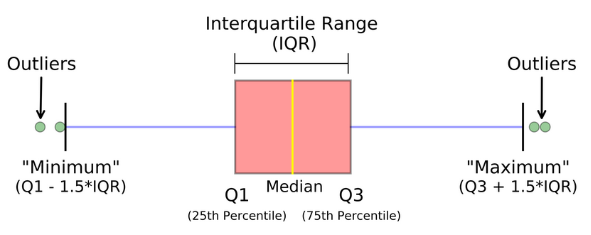

**Read csv file**

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Plot the age**

<AxesSubplot:xlabel='Age'>

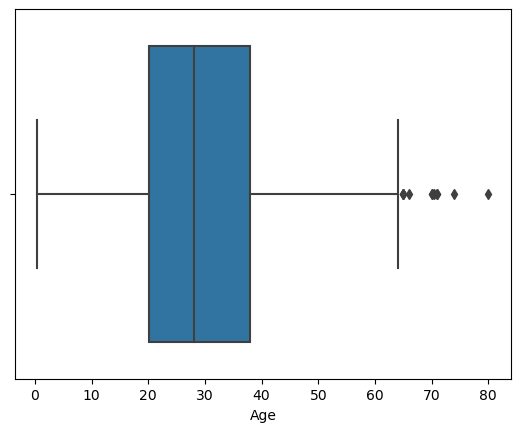

In [4]:
sns.boxplot(data=df, x='Age')

**Calculate the quantiles and interquantiles**

In [5]:
q1 = df['Age'].quantile(0.25)
q1

20.125

In [6]:
q3 = df['Age'].quantile(0.75)
q3

38.0

In [7]:
iqr = q3 - q1
iqr

17.875

In [8]:
up = q3 + 1.5 * iqr
up

64.8125

In [9]:
low = q1 - 1.5 * iqr
low

-6.6875

**Get the outliers**

In [10]:
df[(df['Age'] < low) | (df['Age'] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [11]:
df[(df['Age'] < low) | (df['Age'] > up)].any(axis=None)

True

**Get the normal values**

In [12]:
df[~((df['Age'] < low) | (df['Age'] > up))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df[~((df['Age'] < low) | (df['Age'] > up))].any(axis=None)

True

**Outliers threshold function**

In [14]:
def outlier_threshold(dataframe, col_name, q1=0.25, q3=0.75):
    
    quartile_1 = dataframe[col_name].quantile(q1)
    quartile_3 = dataframe[col_name].quantile(q3)
    interquartile = quartile_3 - quartile_1
    low_limit = quartile_1 - 1.5 * interquartile
    up_limit = quartile_3 + 1.5 * interquartile
    
    return up_limit, low_limit

In [15]:
outlier_threshold(df, 'Age')

(64.8125, -6.6875)

**Outliers check out function**

In [16]:
def check_outlier(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [17]:
check_outlier(df, 'Age')

True

In [18]:
check_outlier(df, 'Fare')

True

**Grap the variables as categorical, numerical and cardinal variables**

In [19]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in df.columns if str(df[col].dtype) in ['category', 'object', 'bool']]
    num_but_cat = [col for col in df.columns if str(df[col].dtype) in ['int64', 'float64'] and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if str(df[col].dtype) in ['category', 'object'] and df[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical Variables: {len(cat_cols)}')
    print(f'Numerical Variables: {len(num_cols)}')
    print(f'Categorical But Cardinal: {len(cat_but_car)}')
    print(f'Numerical But Categorical Variables: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
Categorical Variables: 6
Numerical Variables: 3
Categorical But Cardinal: 3
Numerical But Categorical Variables: 4


In [21]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [22]:
num_cols

['PassengerId', 'Age', 'Fare']

In [23]:
num_cols.remove('PassengerId')

In [24]:
num_cols

['Age', 'Fare']

In [25]:
cat_but_car

['Name', 'Ticket', 'Cabin']

**Check the outliers in numerical variables**

In [26]:
for col in num_cols:
    
    print(col, check_outlier(df, col))

Age True
Fare True


**Grap outliers functions**

In [27]:
def grap_outliers(dataframe, col_name, index=False):
    
    low_limit, up_limit = outlier_threshold(dataframe, col_name)
    
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].shape[0] > 10:
        print(dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].head())
    else:
        print(dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)])
        
    if index == True:
        outlier_index = dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].index
        return outlier_index

In [28]:
grap_outliers(df, 'Age', index=True)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
           dtype='int64', length=714)

In [30]:
age_index = grap_outliers(df, 'Age', index=False)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Removing outlier thresholds from dataframe

In [32]:
def remove_outliers(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    df_without_outlier = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    
    return df_without_outlier

In [33]:
remove_outliers(df, 'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
num_cols

['Age', 'Fare']

In [38]:
for col in num_cols:
    new_df = remove_outliers(df, col)

In [39]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
df.shape[0] - new_df.shape[0]

116

## Re-assigment outlier thresholds

In [43]:
def replace_thresholds(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    dataframe.loc[dataframe[col_name] < low_limit, col_name] = low_limit
    dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit

In [54]:
replace_thresholds(df, 'Age')

In [55]:
check_outlier(df, 'Age')

False

In [48]:
replace_thresholds(df, 'Fare')

In [58]:
check_outlier(df, 'Fare')

False

## Local Outlier Factor

In [66]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(['int64', 'float64'])
df = df.dropna()

In [67]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


**Check Outliers**

In [73]:
for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


**Get the up and low limits for carat**

In [75]:
up, low = outlier_threshold(df, 'carat')
print(up, low)

2.0 -0.5599999999999999


In [78]:
df[(df['carat'] < low) | (df['carat'] > up)].shape[0]

1889

**Get the up and low limits for depth**

In [80]:
up, low = outlier_threshold(df, 'depth')
print(up, low)

64.75 58.75


In [81]:
df[(df['depth'] < low) | (df['depth'] > up)].shape[0]

2545

**Loca Outlier Factor and Score Calculation**

In [86]:
clf = LocalOutlierFactor()

In [87]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [91]:
df_scores = clf.negative_outlier_factor_
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [ ]:
clf.

In [92]:
type(df_scores)

numpy.ndarray

In [94]:
np.sort(df_scores)

array([-8.60430658, -8.20889984, -5.86084355, ..., -0.9162733 ,
       -0.91366494, -0.91247688])

**Catch the outlier limit score**

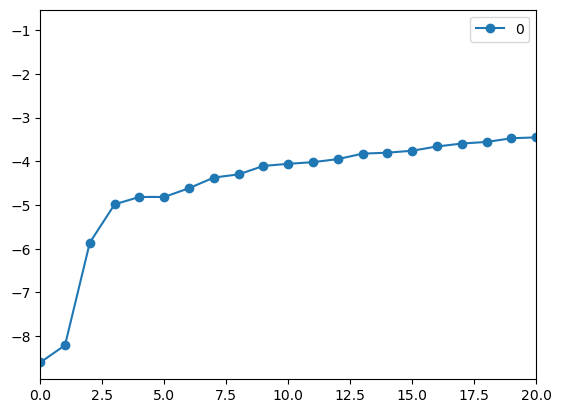

In [109]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(xlim=[0, 20], stacked=True, style='o-')
plt.show()

In [111]:
th = np.sort(df_scores)[3]
th

-4.984151747711709

**Compare the results**

In [117]:
df[df_scores < th]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


**Remove the outliers from dataframe**

In [125]:
df[df_scores < th].index

Int64Index([41918, 48410, 49189], dtype='int64')

In [127]:
df.drop(axis=0, labels=df[df_scores < th].index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
